# LDA parameter search

Duncan Tulimieri 

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings 
warnings.filterwarnings('ignore')
import time 
import seaborn as sns 
# personal classes
from ProcessData import ProcessForestData
import savingfigR as sf 

In [2]:
class pLDA(ProcessForestData):
    
    solvers = ['svd', 'lsqr', 'eigen']

    def __init__(self):
        # method calls 
        self.X_train, self.X_test, self.y_train, self.y_test = self.load_data(perform_scale=False, sub_data_section='')
        # Raw data 
        start = time.time()
        LDA_trained_opt, mean_test_score = self.optimize_LDA_params(self.X_train, self.y_train)
        LDA_score = self.score_LDA(LDA_trained_opt, self.X_test, self.y_test)
        self.param_plot_LDA(mean_test_score=mean_test_score)
        end = time.time()
        print(f'Raw data LDA optimal score = {LDA_score}')
        print(f'Time taken = {end-start}')


    # model 
    def train_LDA(self, X, y, solver='svd'):
        if solver == 'svd':
            return LinearDiscriminantAnalysis(solver = solver).fit(X, y)
        else:
            return LinearDiscriminantAnalysis(solver = solver, shrinkage='auto').fit(X, y)

    def score_LDA(self, trained_LDA_model, X_test, y_test):
        return trained_LDA_model.score(X_test, y_test)

    def predict_LDA(self, trained_LDA_model, X_test):
        return trained_LDA_model.predict(X_test)
    
    def optimize_LDA_params(self, X_train, y_train, solver_options=solvers, cv=10, scoring='accuracy'):
        LDA_raw = LinearDiscriminantAnalysis()
        cv_train_model = GridSearchCV(LDA_raw, param_grid={'solver':solver_options}, cv=cv, scoring=scoring).fit(X_train, y_train)
        mean_test_score = cv_train_model.cv_results_['mean_test_score']
        print(f'Best LDA parameters: solver = {cv_train_model.best_params_["solver"]}')
        best_model = self.train_LDA(X_train, y_train, solver=cv_train_model.best_params_["solver"])
        return best_model, mean_test_score

    # visualization 
    def param_plot_LDA(self, mean_test_score):
        plt_styles, bgs = ['seaborn-bright', 'dark_background'], ['_wbg', '_kbg']
        for bg, style in zip(bgs, plt_styles):
            with plt.style.context(style):
                fig = plt.figure()
                sns.barplot(x=self.solvers, y=mean_test_score)
                plt.xlabel('LDA solvers')
                plt.ylabel('CV Scores for LDA parameter')
                plt.show()
                sf.best_save(fig, 'LDA_params'+bg)

Best LDA parameters: solver = svd


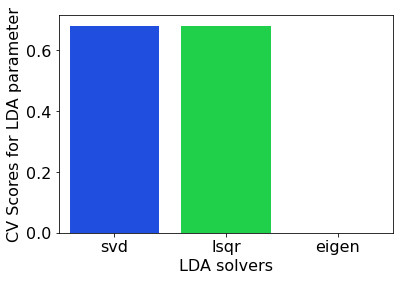

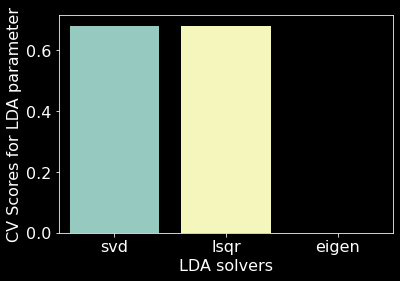

Raw data LDA optimal score = 0.6777256079090133
Time taken = 212.25024795532227


In [3]:
testLDA = pLDA()